## Student Performance Indicator

### Machine Learning Project Life Cycle
- Understanding the Problem Statement
- Data Collection
- Data checks to perform
- Data Pre-Processing
- Exploratory Data Analysis
- Model Training
- Choose best model


### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [3]:
std_df = pd.read_csv('data/stud.csv')

#### Show top 5 records

In [4]:
std_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Show bottom 5 records

In [6]:
std_df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


#### Shape of the dataset

In [5]:
std_df.shape

(1000, 8)

### DataSet Information
- gender - sex of the student = male/female
- race/ethnicity - ethnicity of the student = Groups (A, B, C, D, E)
- parental level of education - Final education of the parents = (bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch - having lunch before the exam/test = Standard (or) free/reduced
- test preparation course - Preparation is completed or not  = completed/none
- math score
- reading score
- writing score

#### 3. Data Checks to perform
- Check Missing values
- Check Duplicate records
- Check data type
- Check the number of unique values in each
- Check statistics of the data set
- Check various categories present in each categorical column

#### 3.1 Check Missing values

In [7]:
std_df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicate records

In [9]:
std_df.duplicated().sum()

0

#### There are no duplicate records in the data set

### 3.3 Check Data Types

In [10]:
std_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Numerical columns = [math_score, reading_score, writing_score]
#### Categorical columns = [gender, race_ethnicity, parental_level_of_education, lunch, test_preparation_course]

### 3.4 Checking the number of unique values of each column

In [11]:
std_df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [12]:
std_df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From the above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading is most higher = 17

### 3.6 Exploring Data

In [13]:
std_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
print("Categories in 'gender' variable: ",end=" " )
print(std_df['gender'].unique(),"\n")

print("Categories in 'race_ethnicity' variable: ",end=" ")
print(std_df['race_ethnicity'].unique(), "\n")

print("Categories in'Parental level of education' variable:",end=" " )
print(std_df['parental_level_of_education'].unique(),"\n")

print("Categories in 'lunch' variable: ",end=" " )
print(std_df['lunch'].unique(),"\n")

print("Categories in 'test preparation course' variable: ",end=" " )
print(std_df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male'] 

Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E'] 

Categories in'Parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

Categories in 'lunch' variable:  ['standard' 'free/reduced'] 

Categories in 'test preparation course' variable:  ['none' 'completed']


In [23]:
#defining numerical features and categorical features
numerical_features = [feature for feature in std_df.columns if std_df[feature].dtype != 'O']
categorical_features = [feature for feature in std_df.columns if std_df[feature].dtype == 'O']

#print columns
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.7 Creating columns for 'Total score' and 'Average'

In [25]:
std_df['Total score'] = std_df['math_score']+std_df['reading_score'] + std_df['writing_score']
std_df['Average'] = std_df['Total score']/3
std_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [29]:
std_df[std_df['reading_score'] == 100]['Average']

106     95.666667
114     99.666667
149     97.666667
165     98.666667
179     99.000000
381     94.000000
458    100.000000
546     96.333333
566     97.333333
594     97.000000
712     99.000000
886     96.000000
903     97.666667
916    100.000000
957     97.333333
962    100.000000
970     96.333333
Name: Average, dtype: float64

In [30]:
reading_full = std_df[std_df['reading_score'] == 100]['Average'].count()
writing_full = std_df[std_df['writing_score'] == 100]['Average'].count()
math_full = std_df[std_df['math_score'] == 100]['Average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [31]:
reading_less_20 = std_df[std_df['reading_score'] <= 20]['Average'].count()
writing_less_20 = std_df[std_df['writing_score'] <= 20]['Average'].count()
math_less_20 = std_df[std_df['math_score'] <= 20]['Average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#### Insights:
- Students have worst performed in Maths
- Students has best performed in Reading

### 4. Exploring Data (Visualization)
#### 4.1 Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

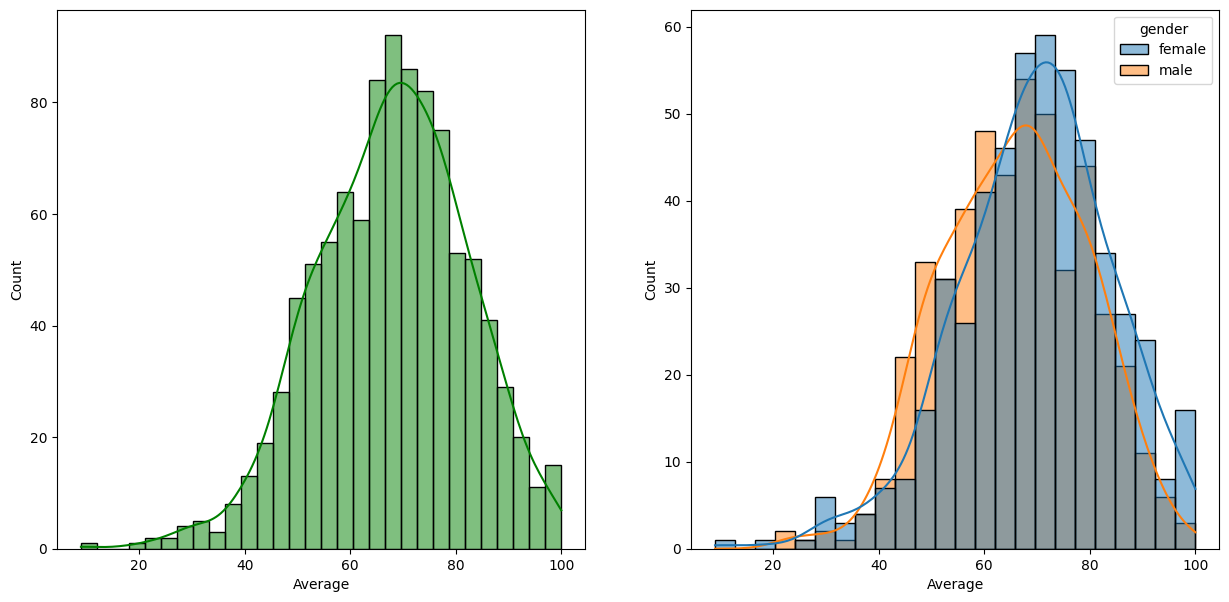

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=std_df, x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=std_df,x='Average',kde=True,hue='gender')
plt.show()

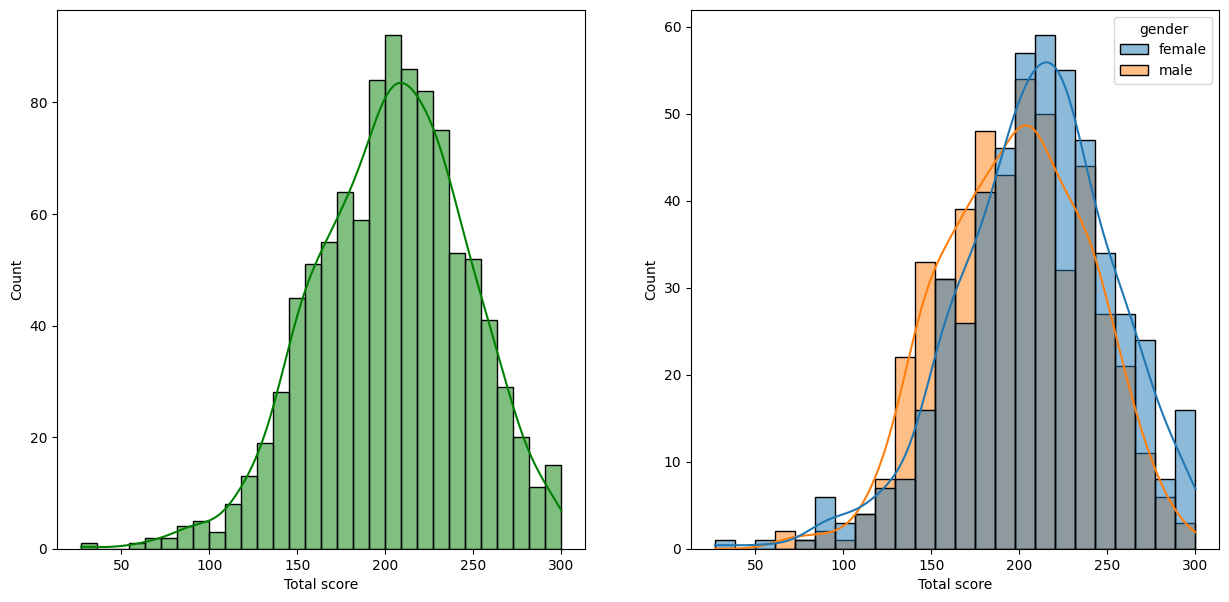

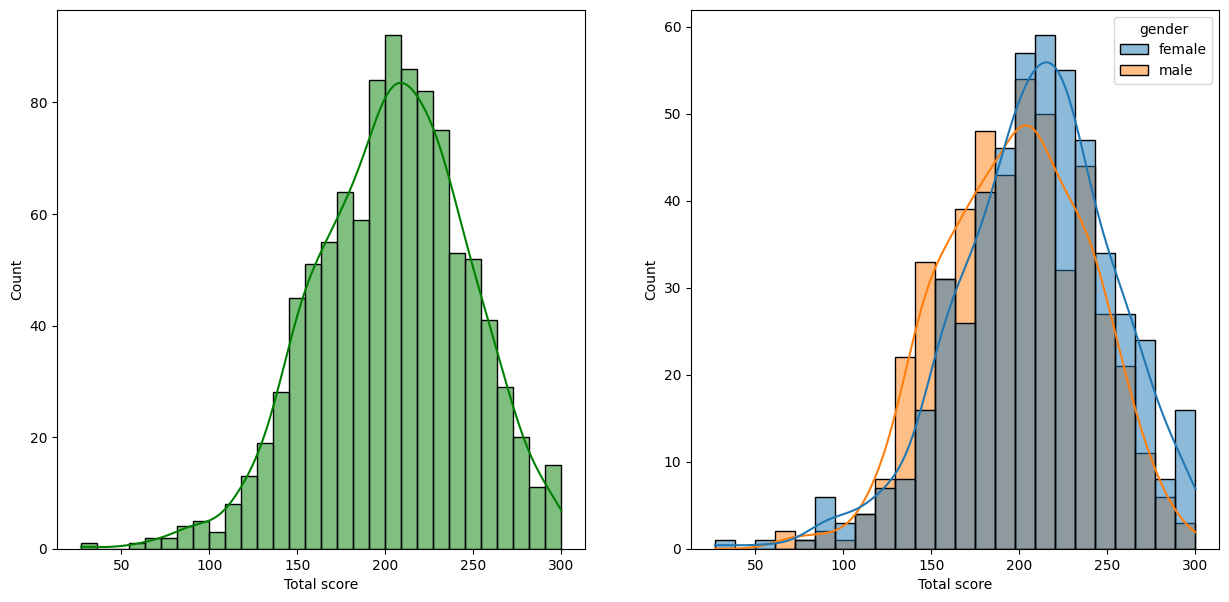

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=std_df,x='Total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=std_df,x='Total score',kde=True,hue='gender')
plt.show()

#### Insights:
- Female students performed well than Male students

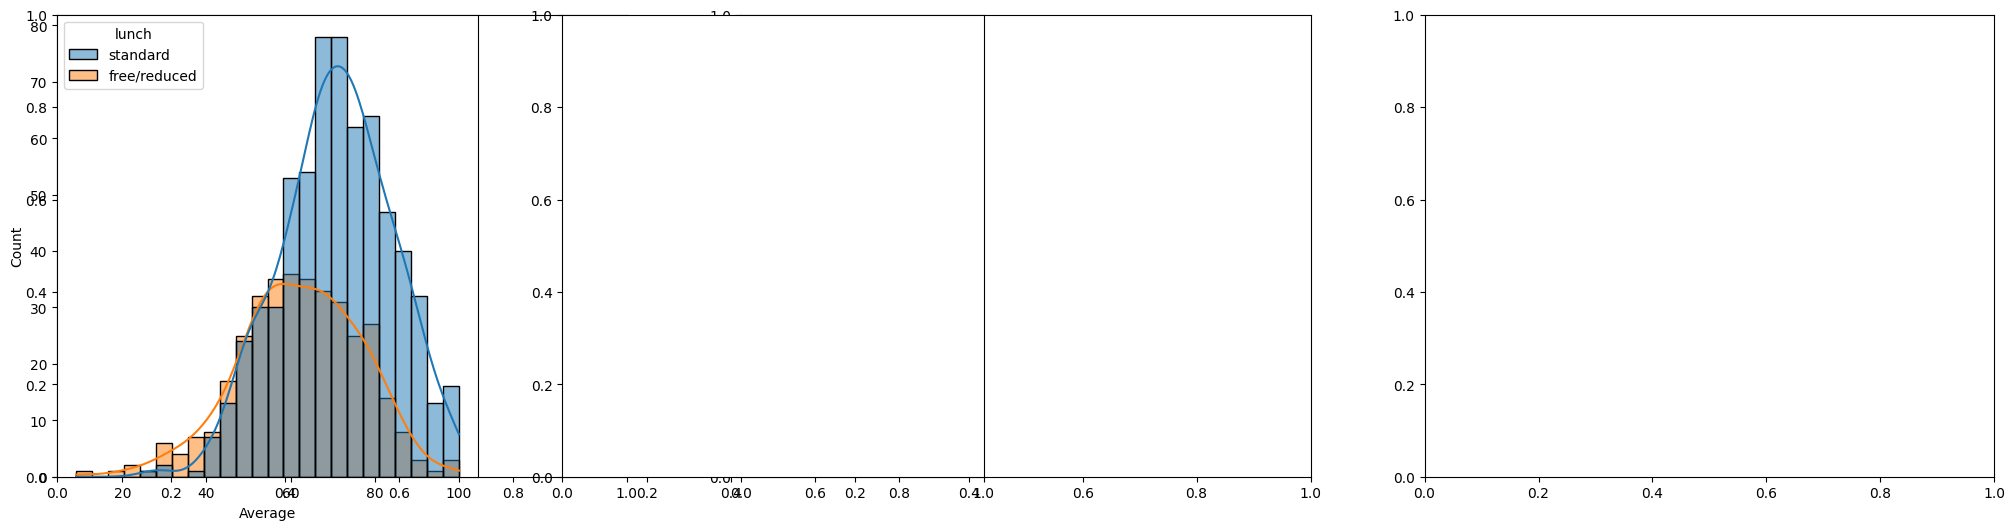

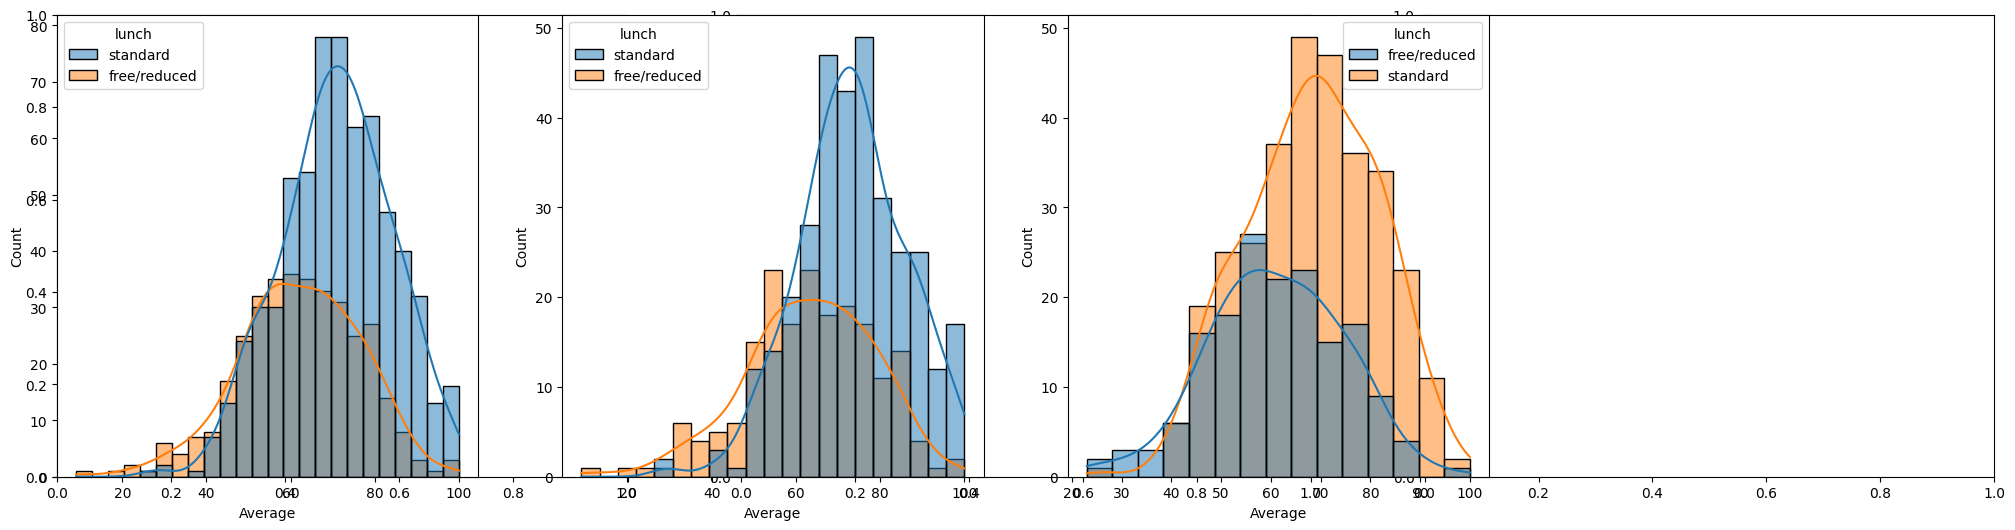

In [40]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=std_df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=std_df[std_df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=std_df[std_df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()

#### Insights:
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

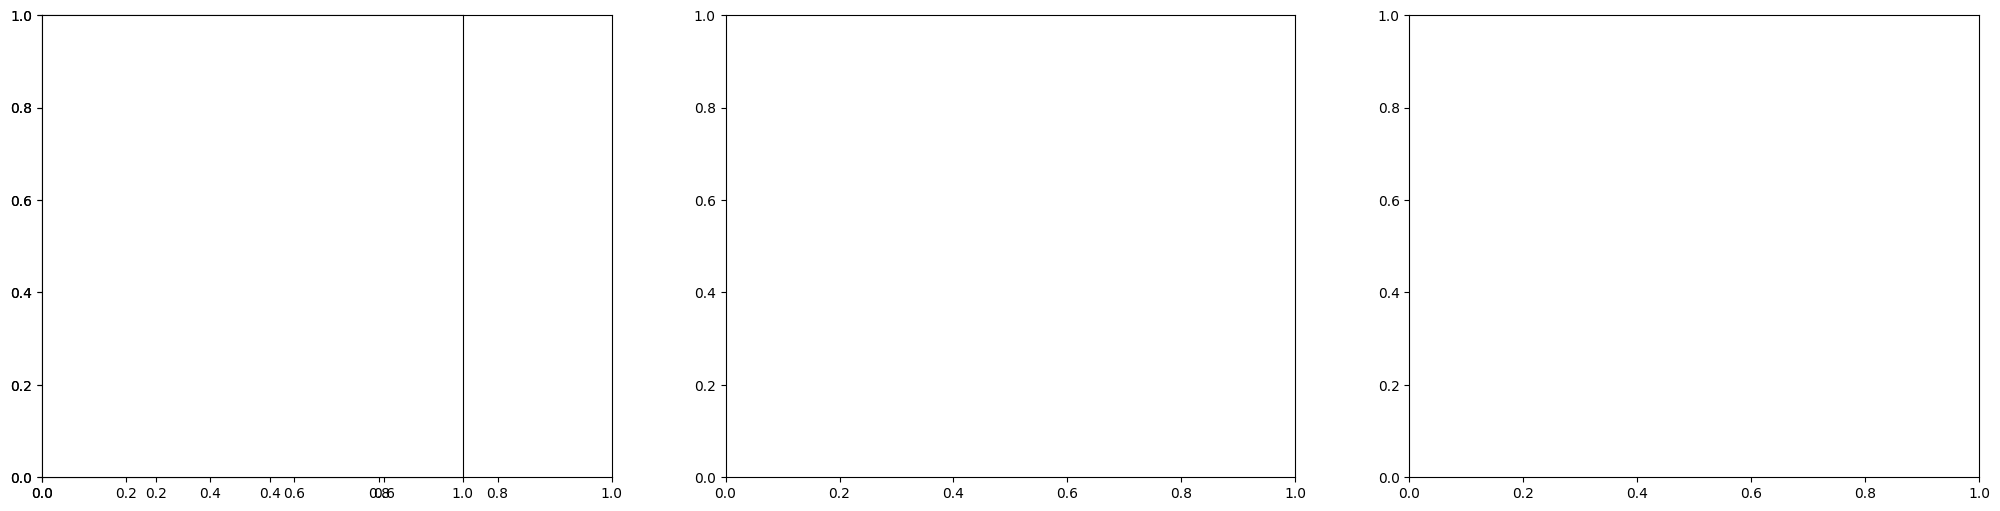

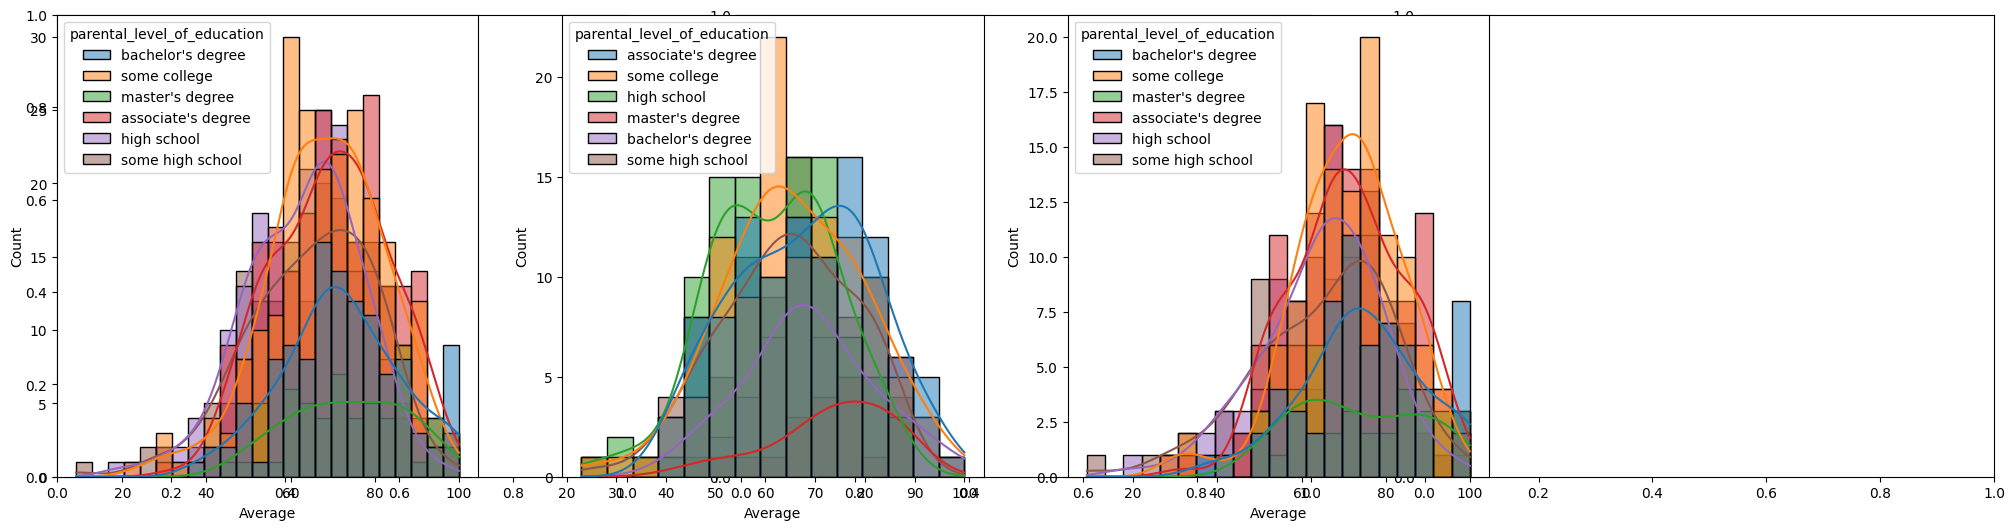

In [42]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=std_df,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=std_df[std_df.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=std_df[std_df.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.show()

#### Insights:
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

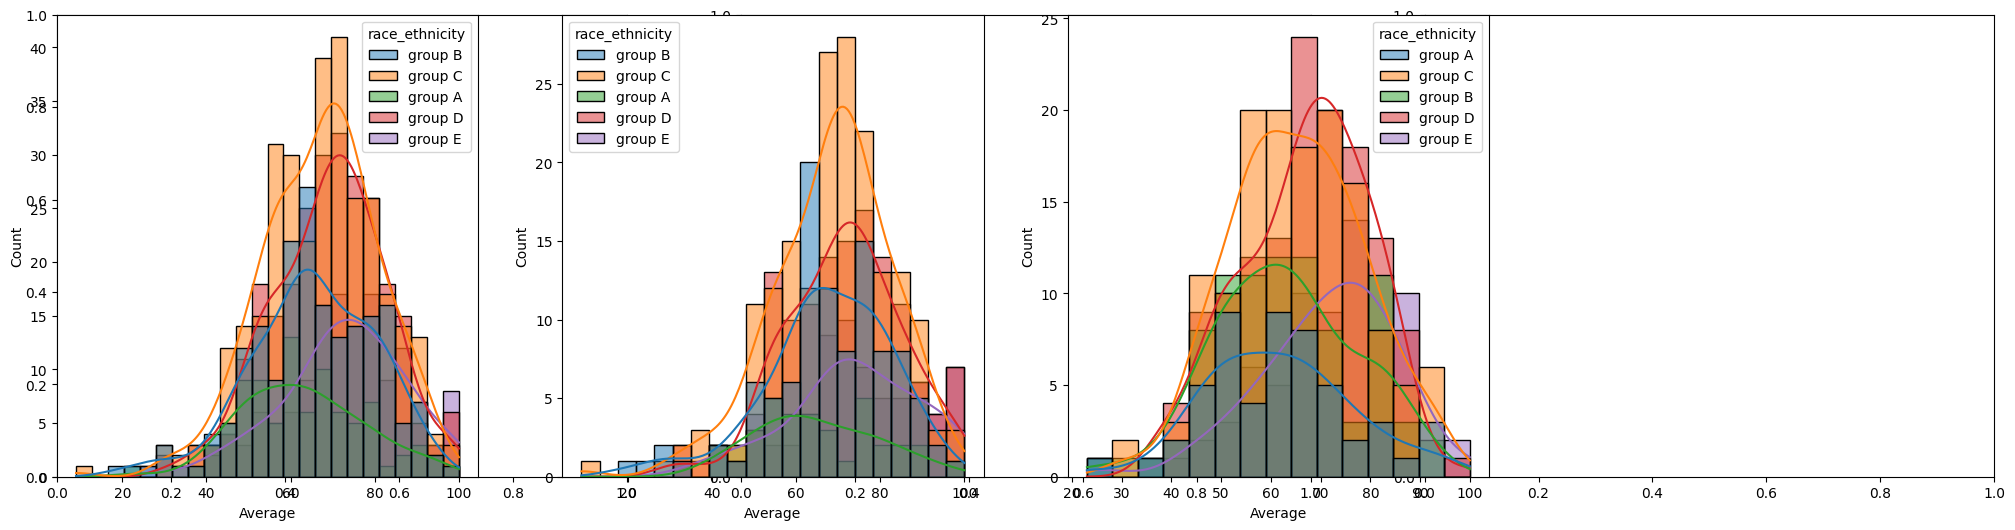

In [43]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=std_df,x='Average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=std_df[std_df.gender=='female'],x='Average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=std_df[std_df.gender=='male'],x='Average',kde=True,hue='race_ethnicity')
plt.show()

#### Insights:
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### 4.2 Maximumum score of students in all three subjects

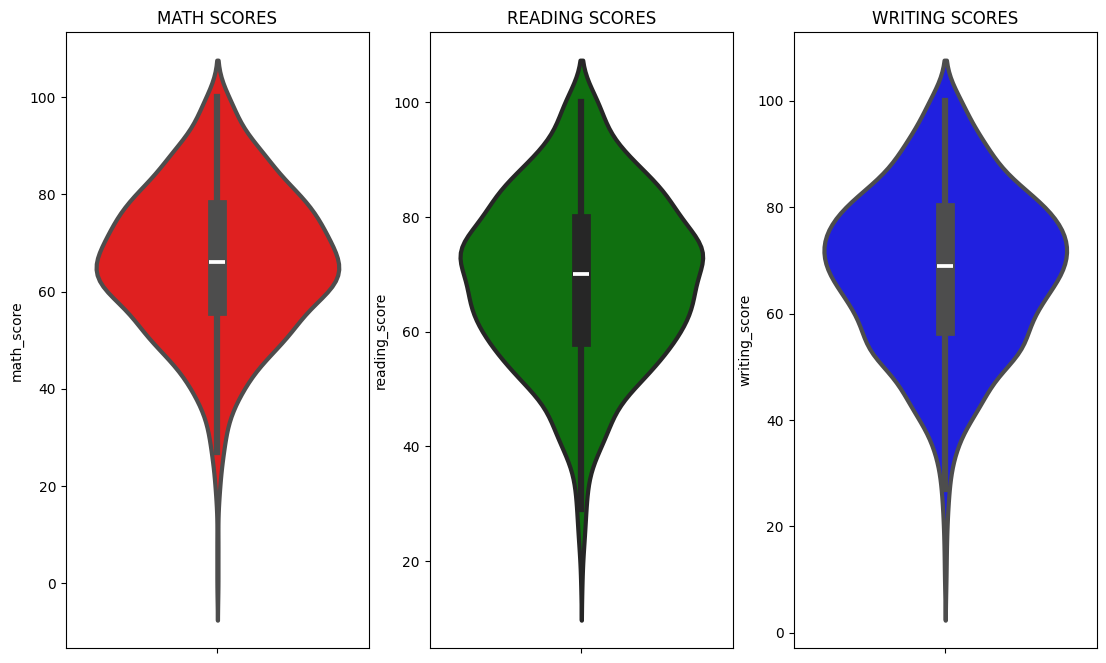

In [45]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=std_df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=std_df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=std_df,color='blue',linewidth=3)
plt.show()

#### Insights:
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### 4.3 Multivariate analysis using pieplot

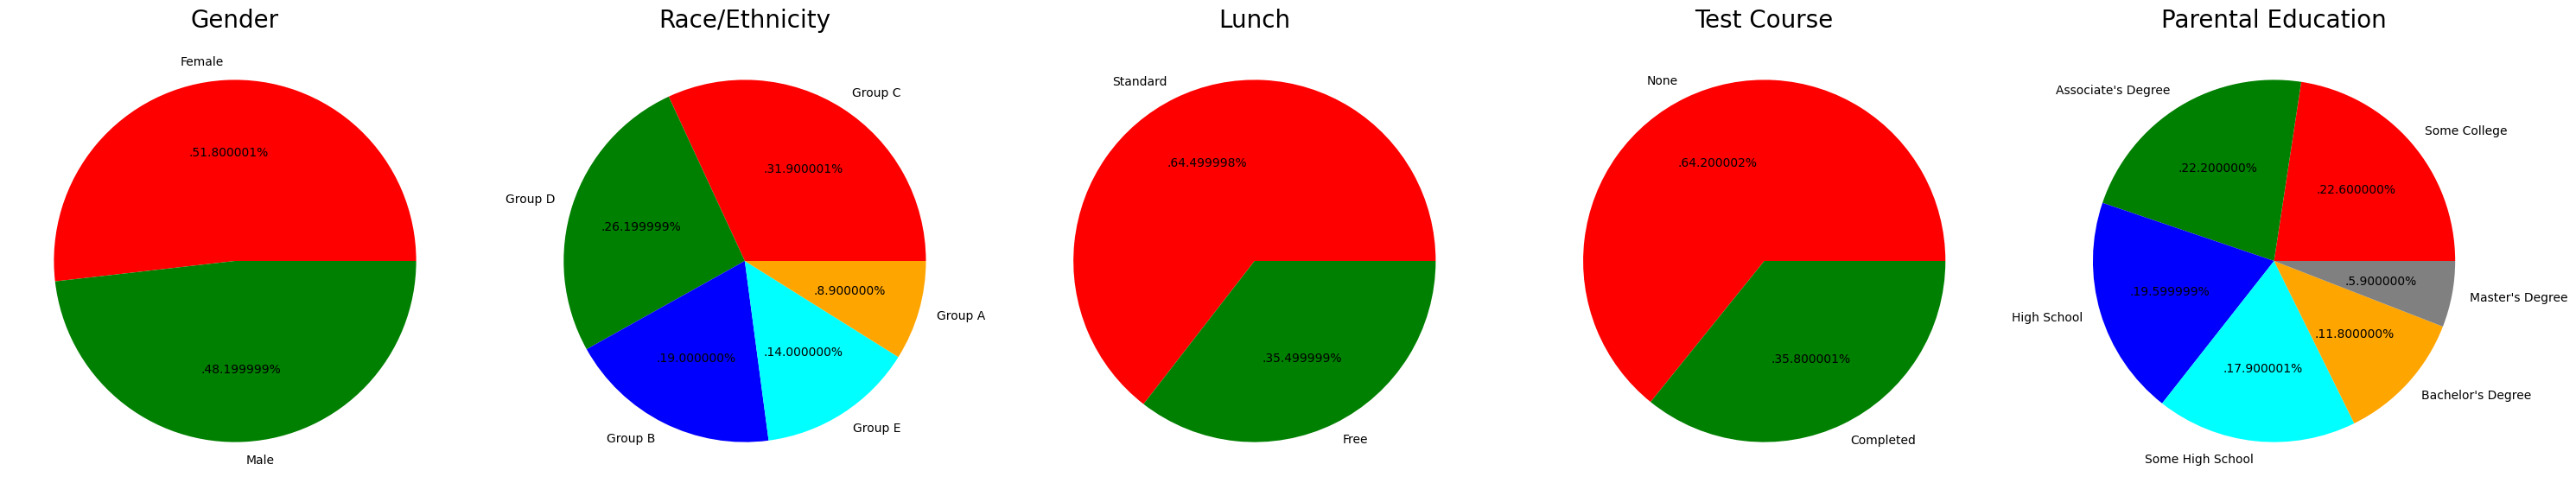

In [46]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = std_df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = std_df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = std_df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = std_df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = std_df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insights:
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree" and then "High School"

### 4.4 Feature Wise Visualization

#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

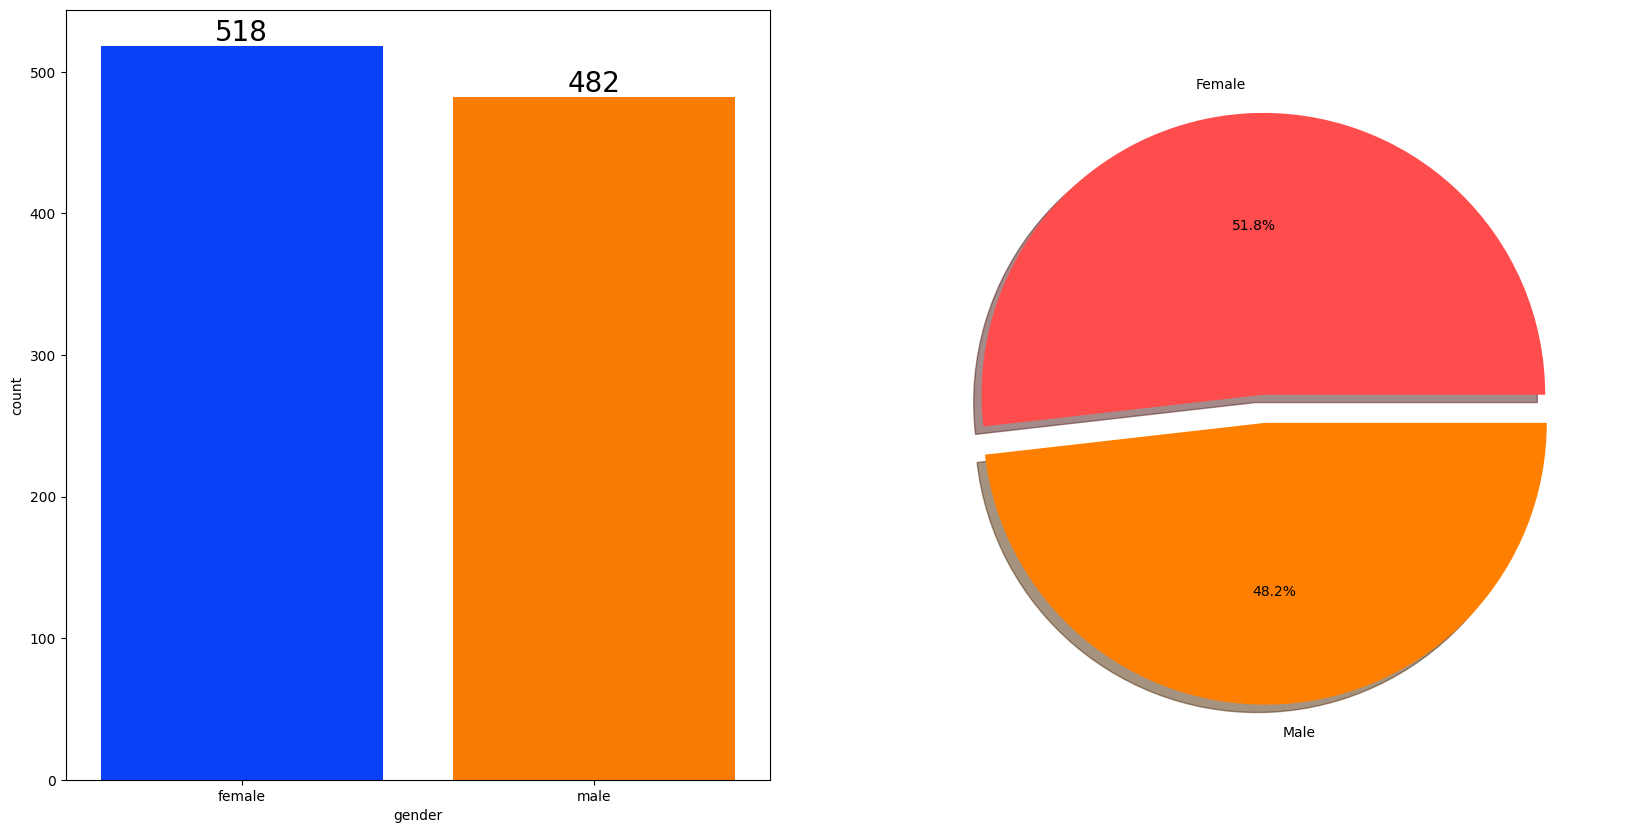

In [49]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=std_df['gender'],data=std_df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=std_df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights:
- Gender has balanced data with female students are 518 (52%) and male students are 482 (48%)

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [53]:
gender_group = std_df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,Total score,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


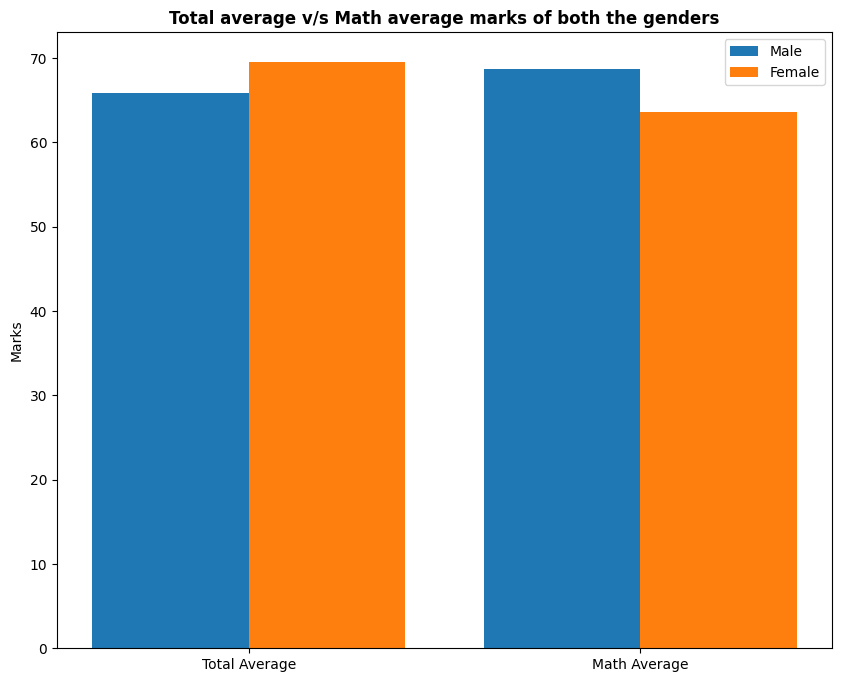

In [54]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['Average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['Average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights:
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

### 4.4.2 RACE/ETHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ethnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

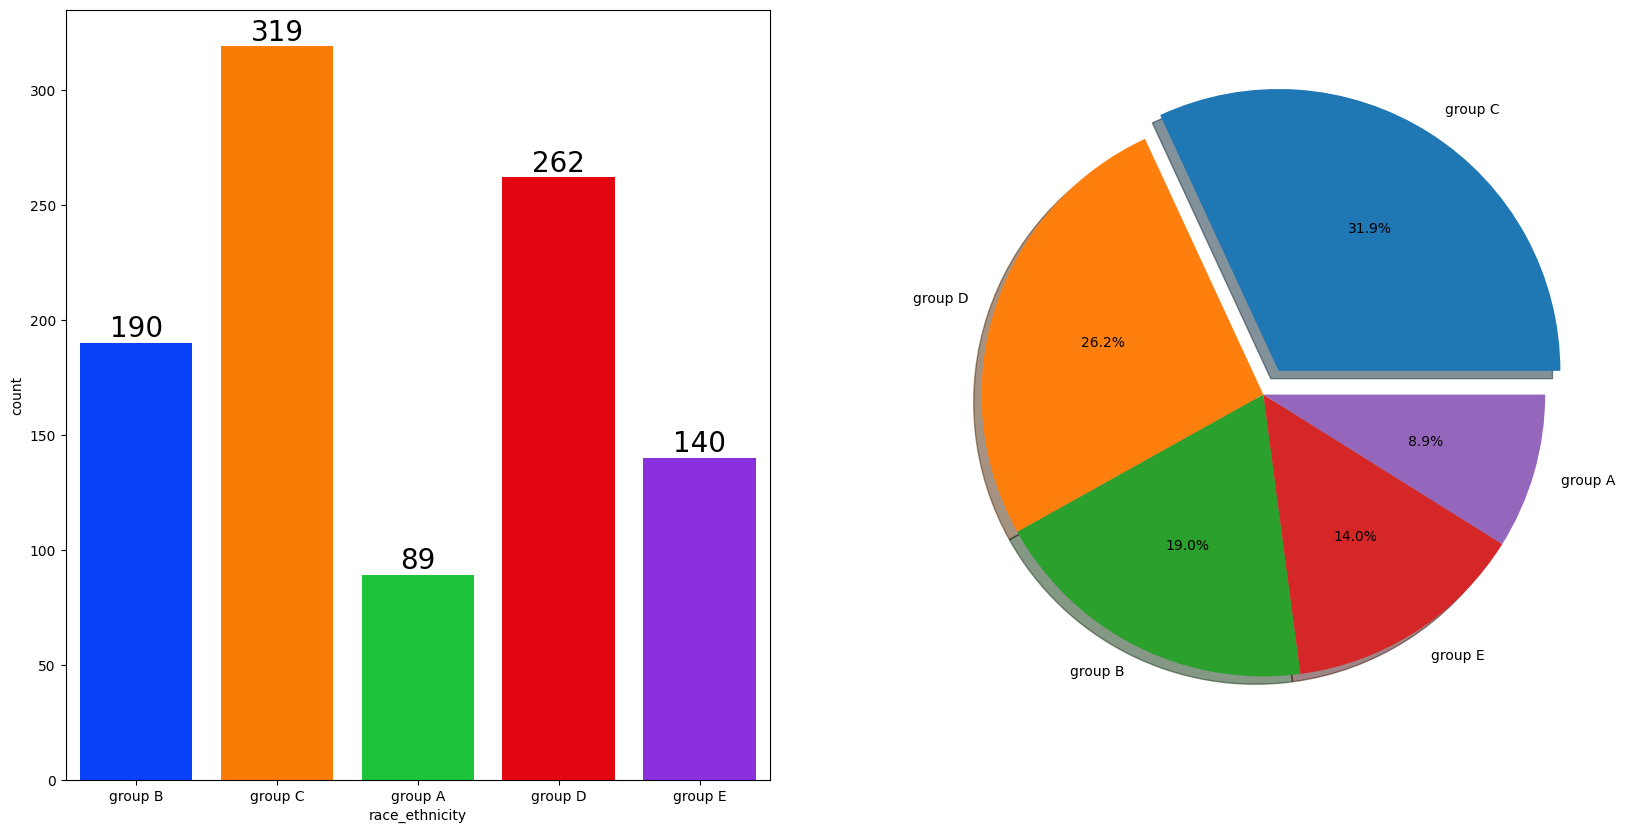

In [56]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=std_df['race_ethnicity'],data=std_df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = std_df['race_ethnicity'].value_counts(),labels=std_df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights:
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ethnicity has any impact on student's performance ? )

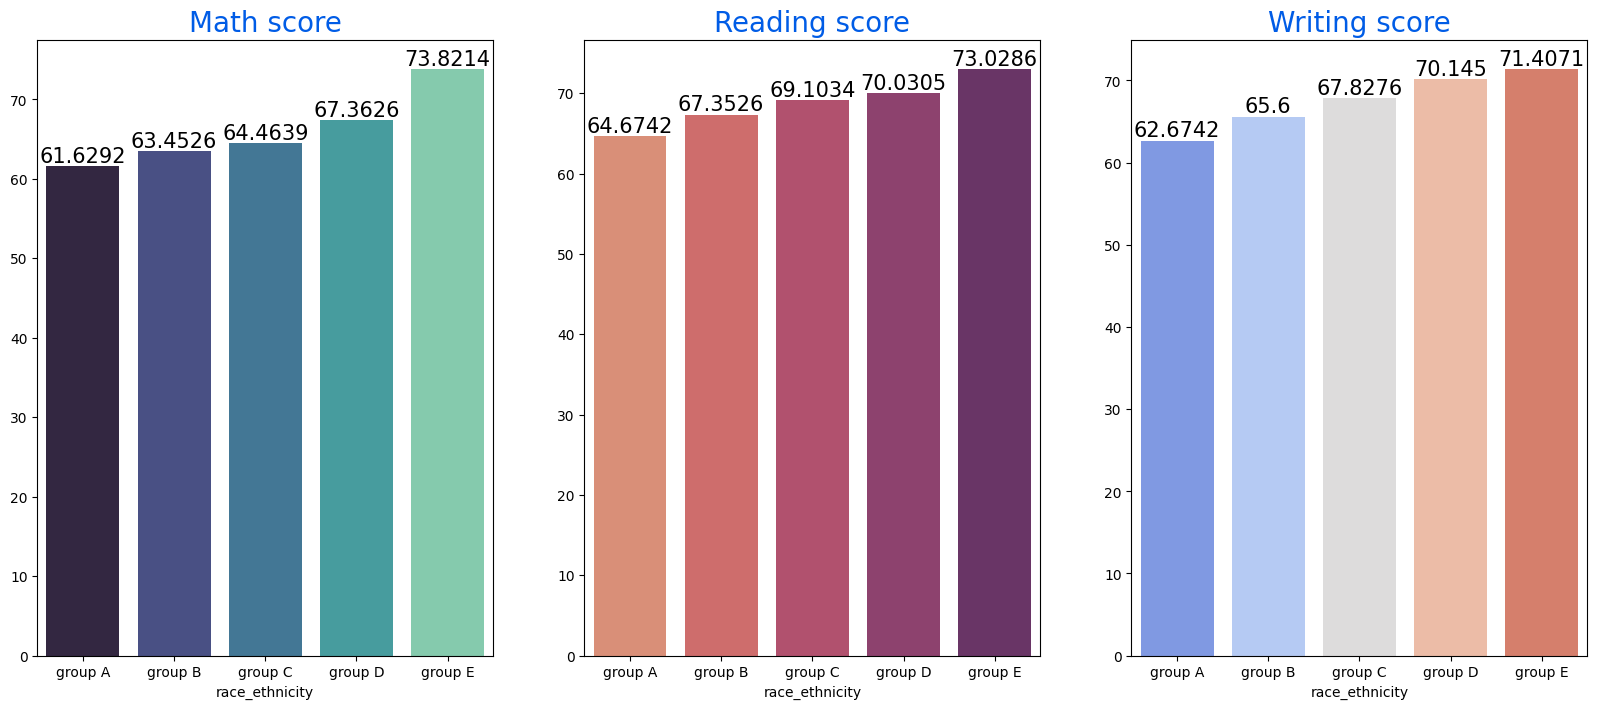

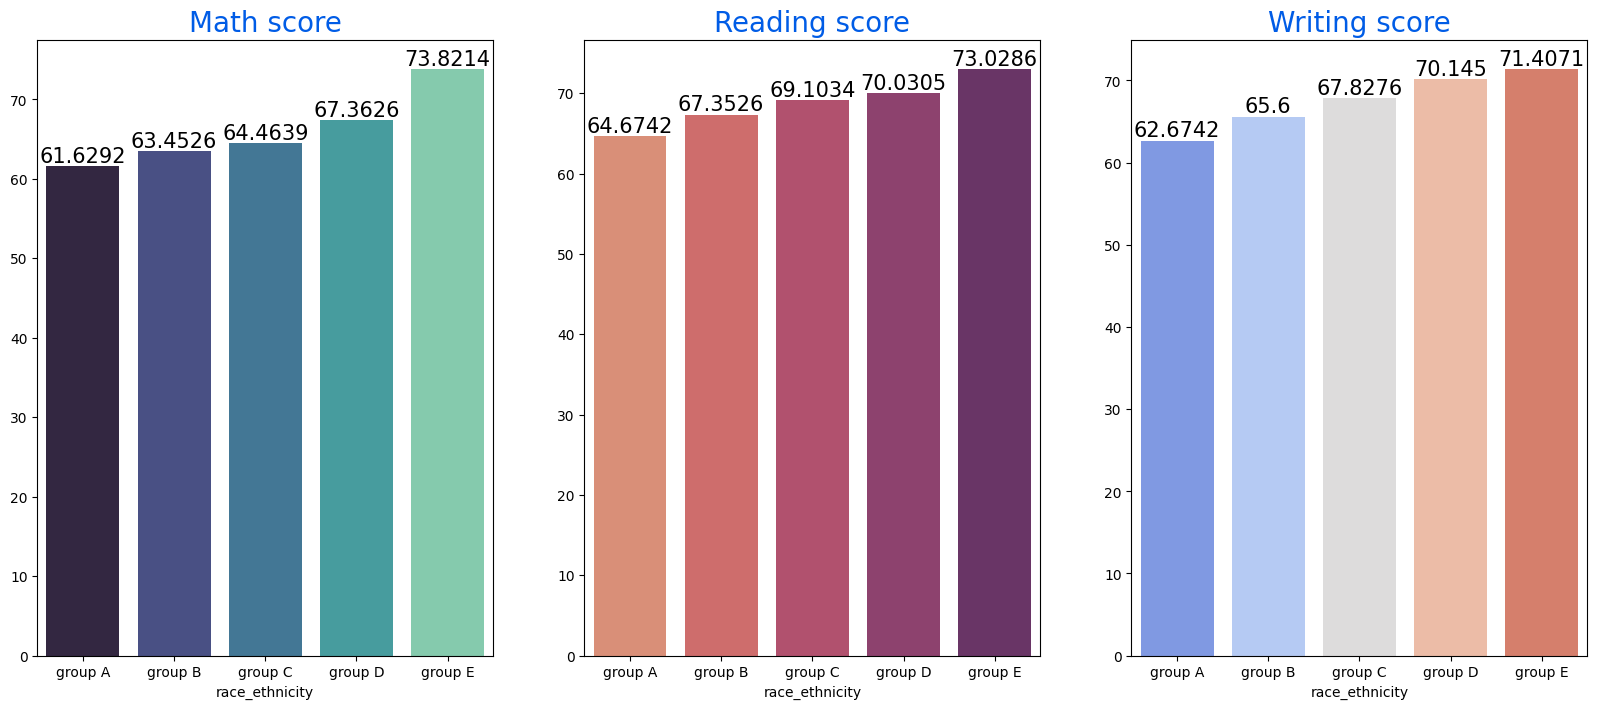

In [58]:
Group_data2=std_df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

plt.show()

#### Insights:
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

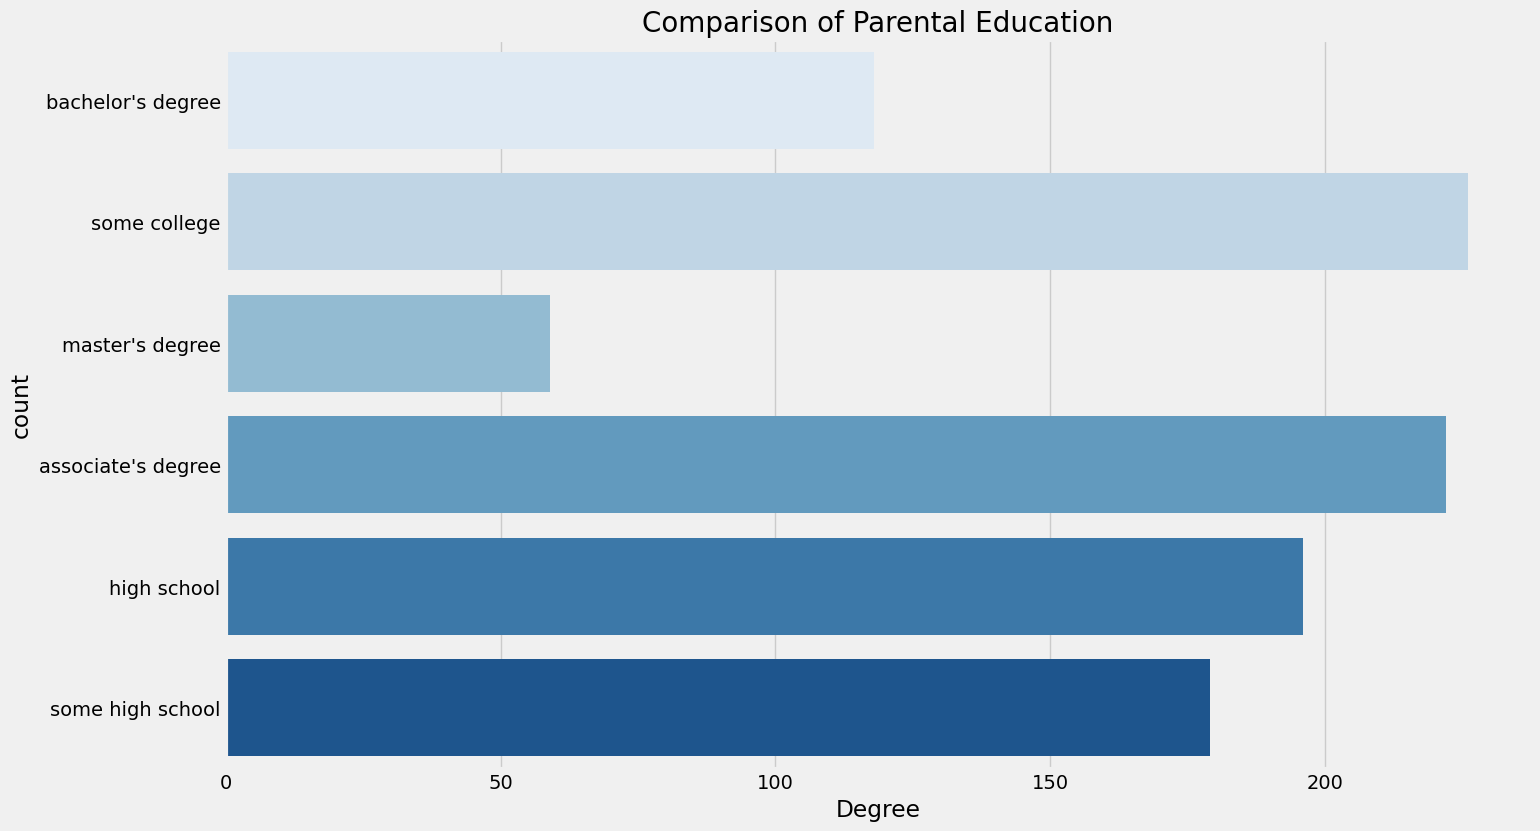

In [59]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(std_df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights
- Largest number of parents are from some college, followed by associate's degree

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

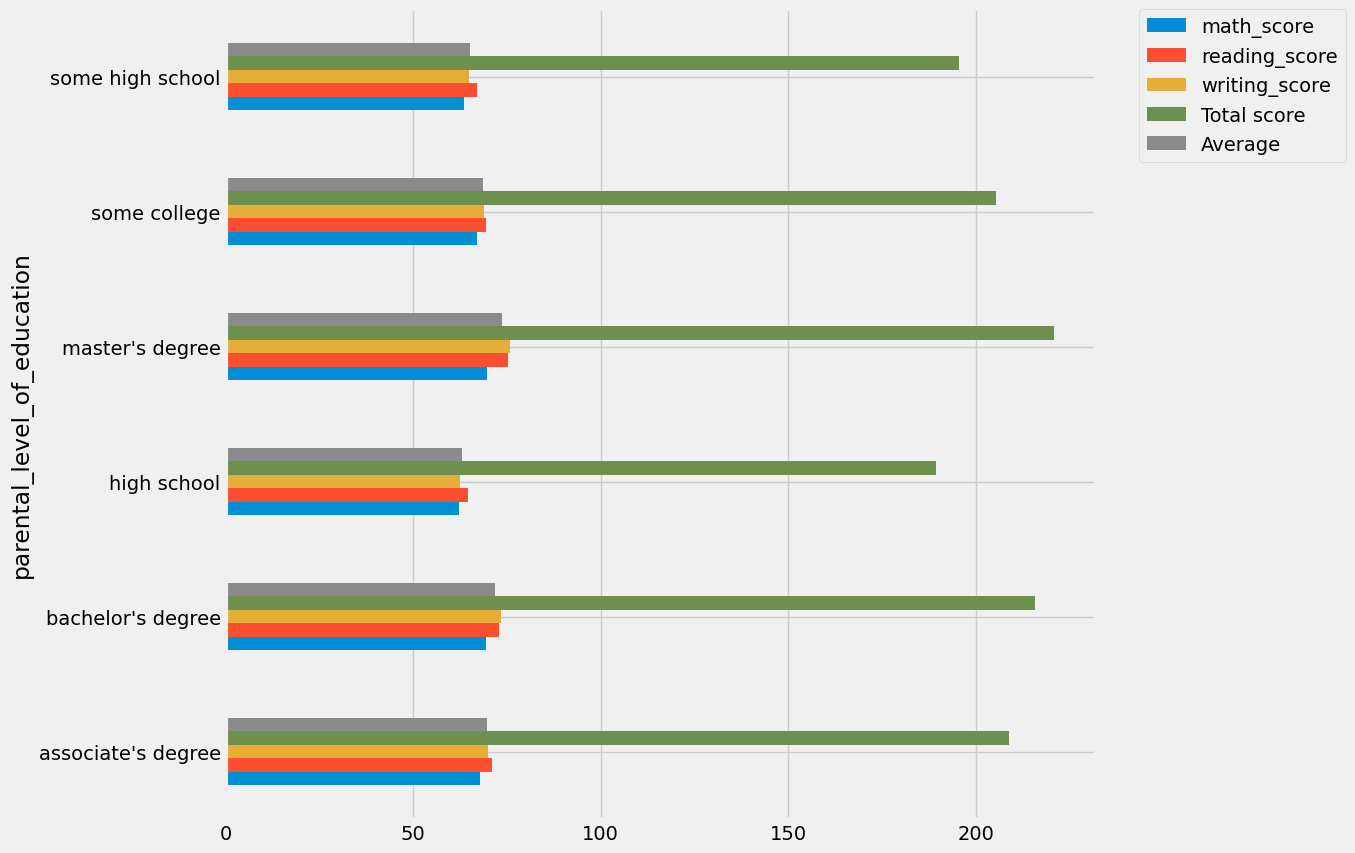

In [62]:
std_df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights:
- The score of student whose parents possess master and bachelor level education are higher than others.

### 4.4.4 LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?
#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

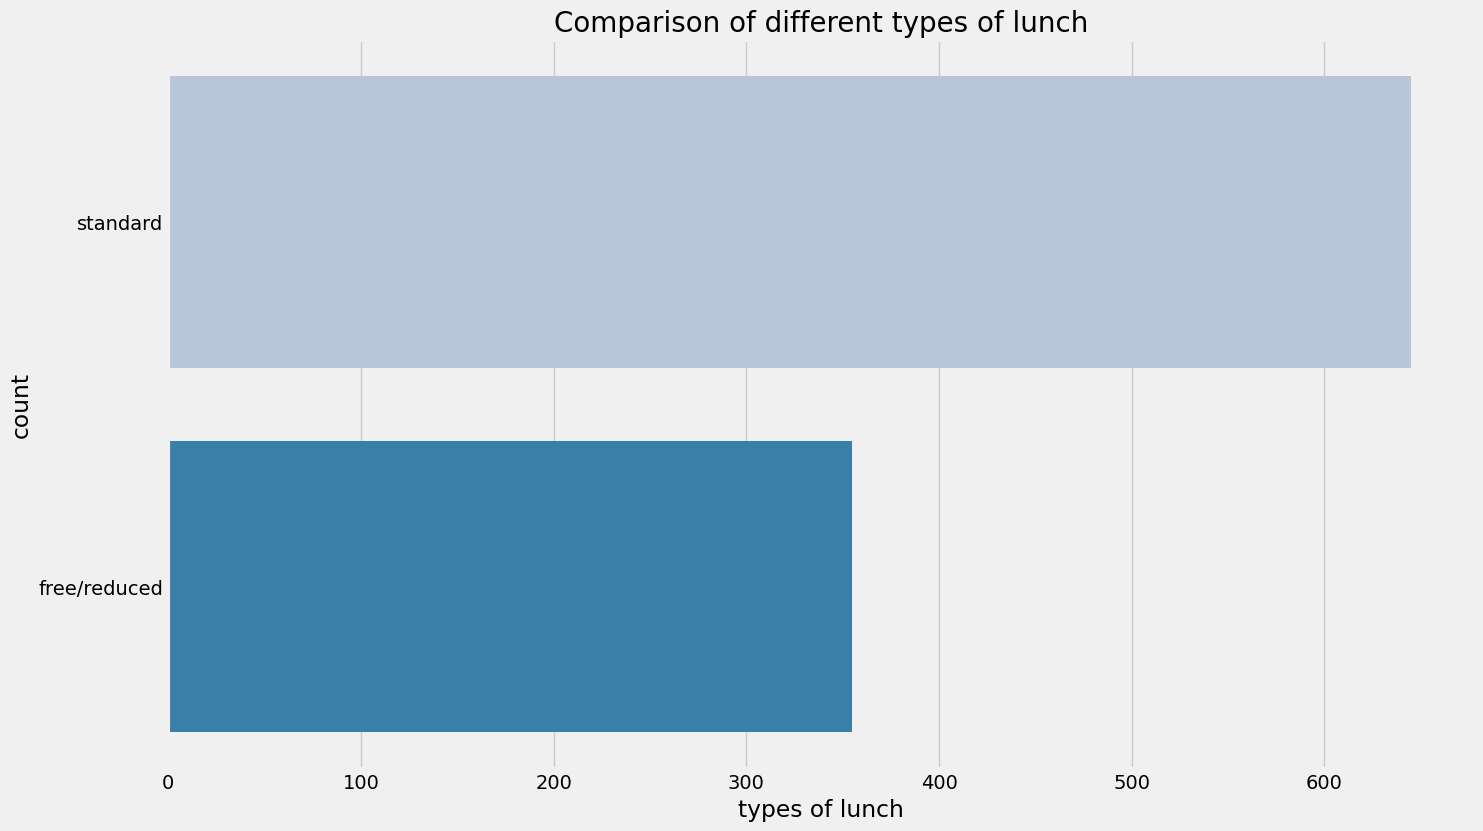

In [64]:
plt.rcParams['figure.figsize'] = (15, 9)
#plt.style.use('seaborn-talk')
sns.countplot(std_df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights:
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

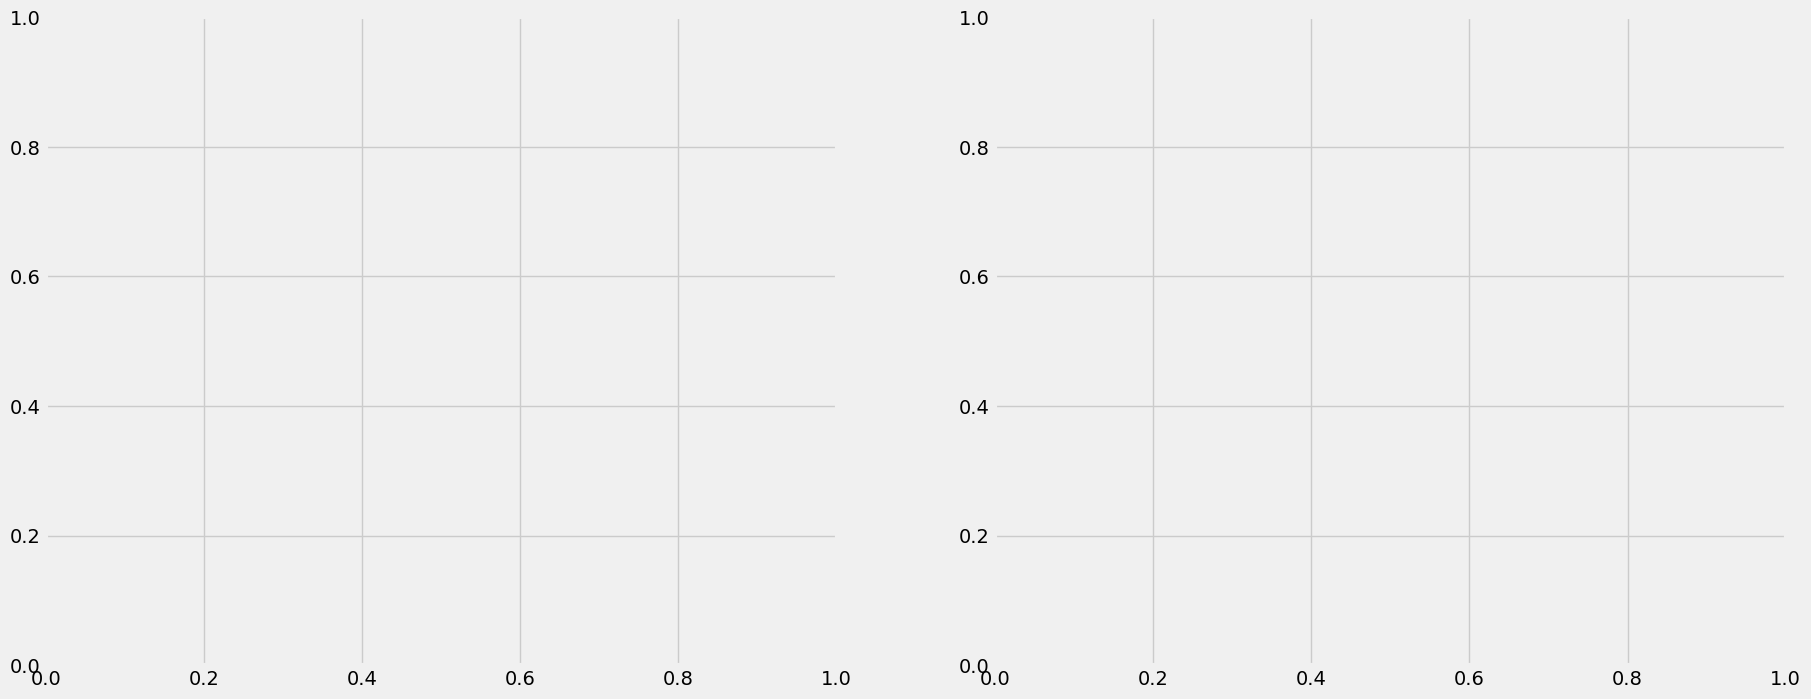

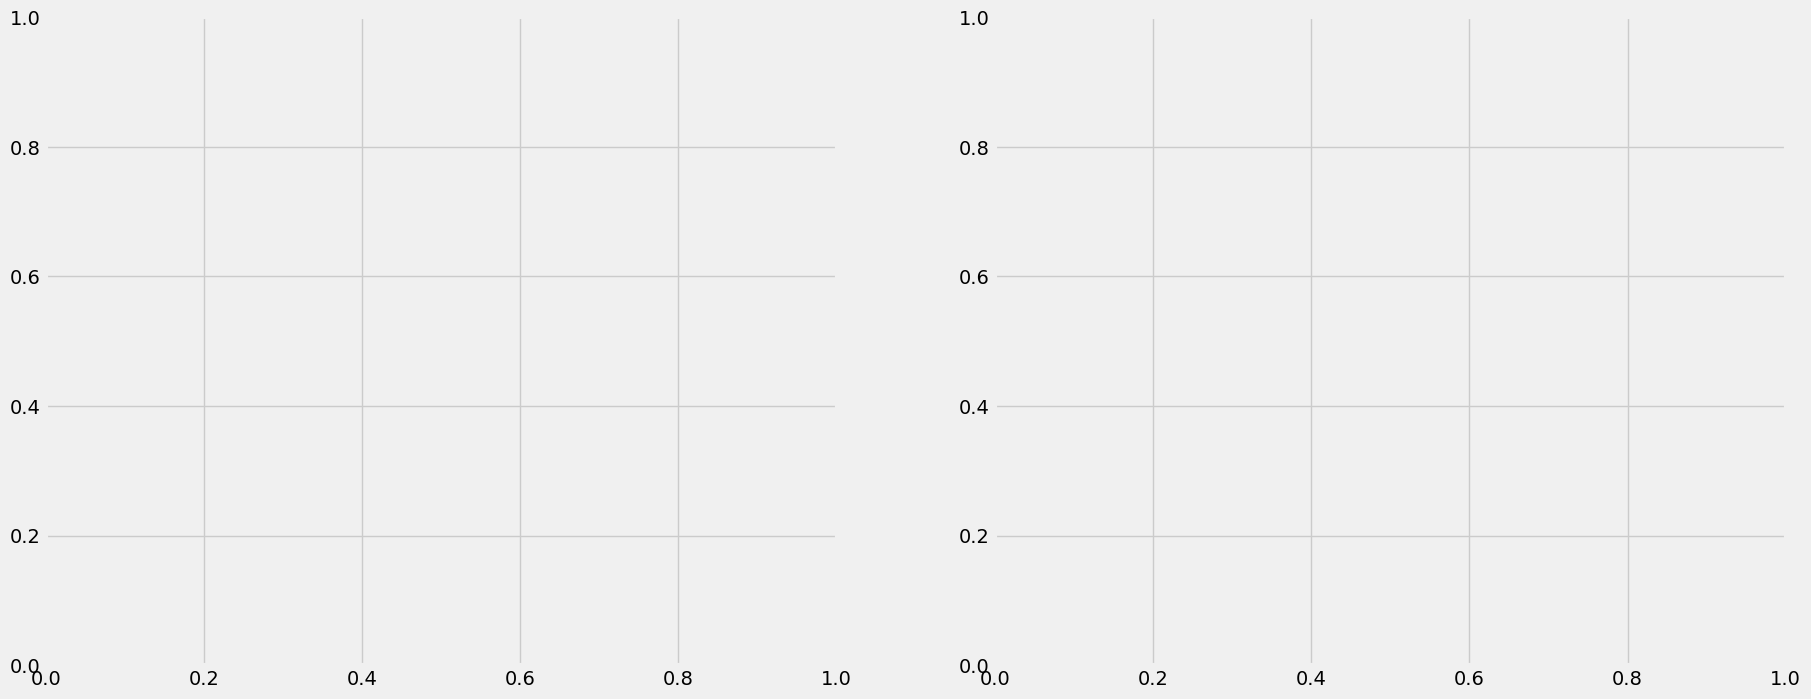

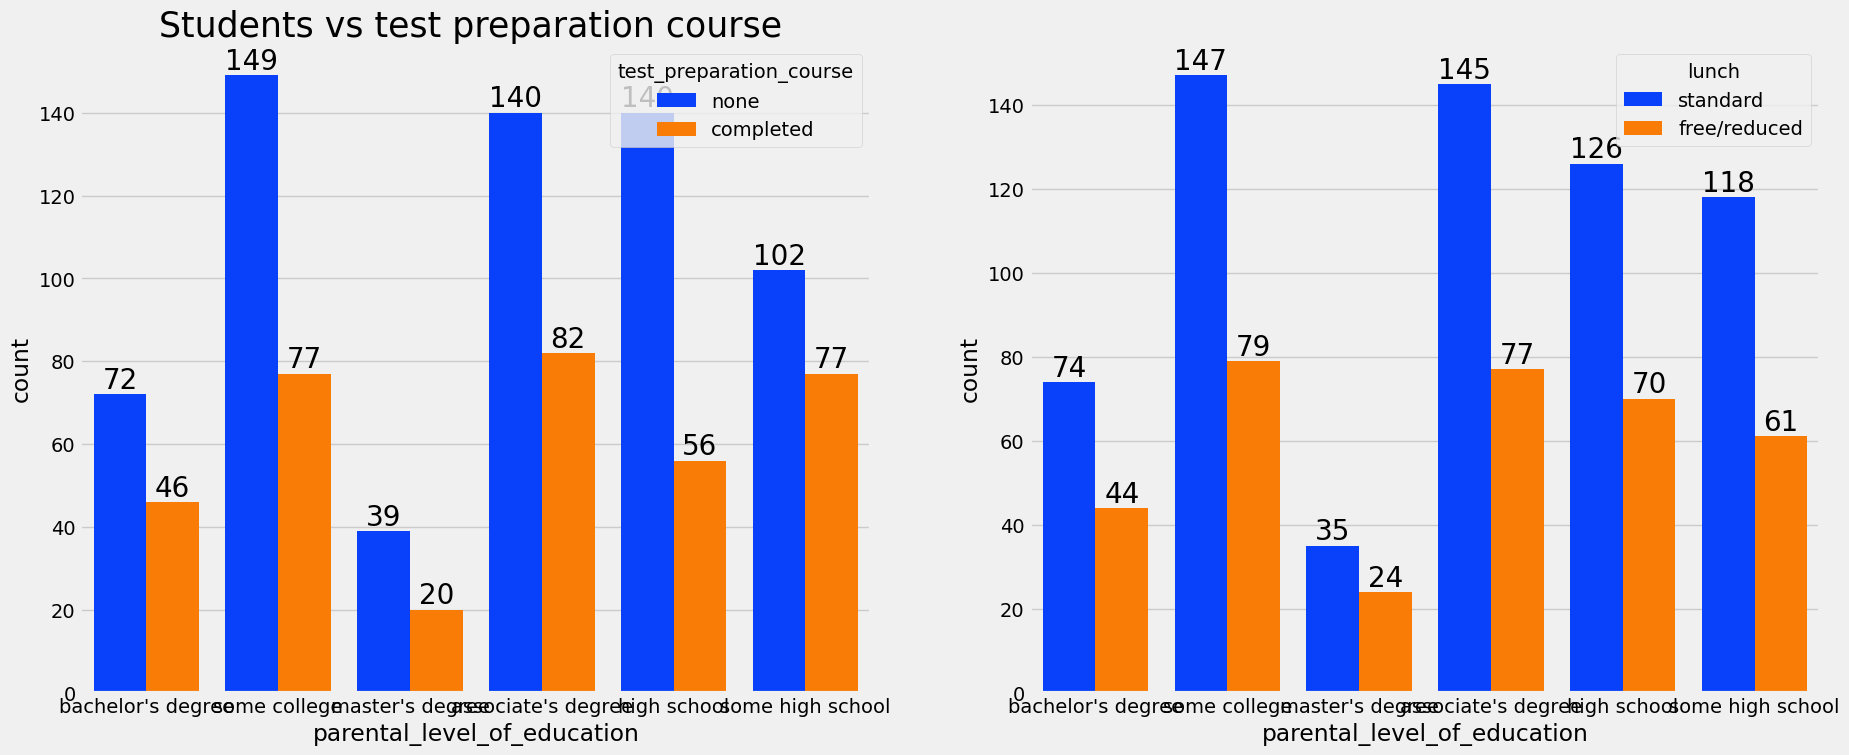

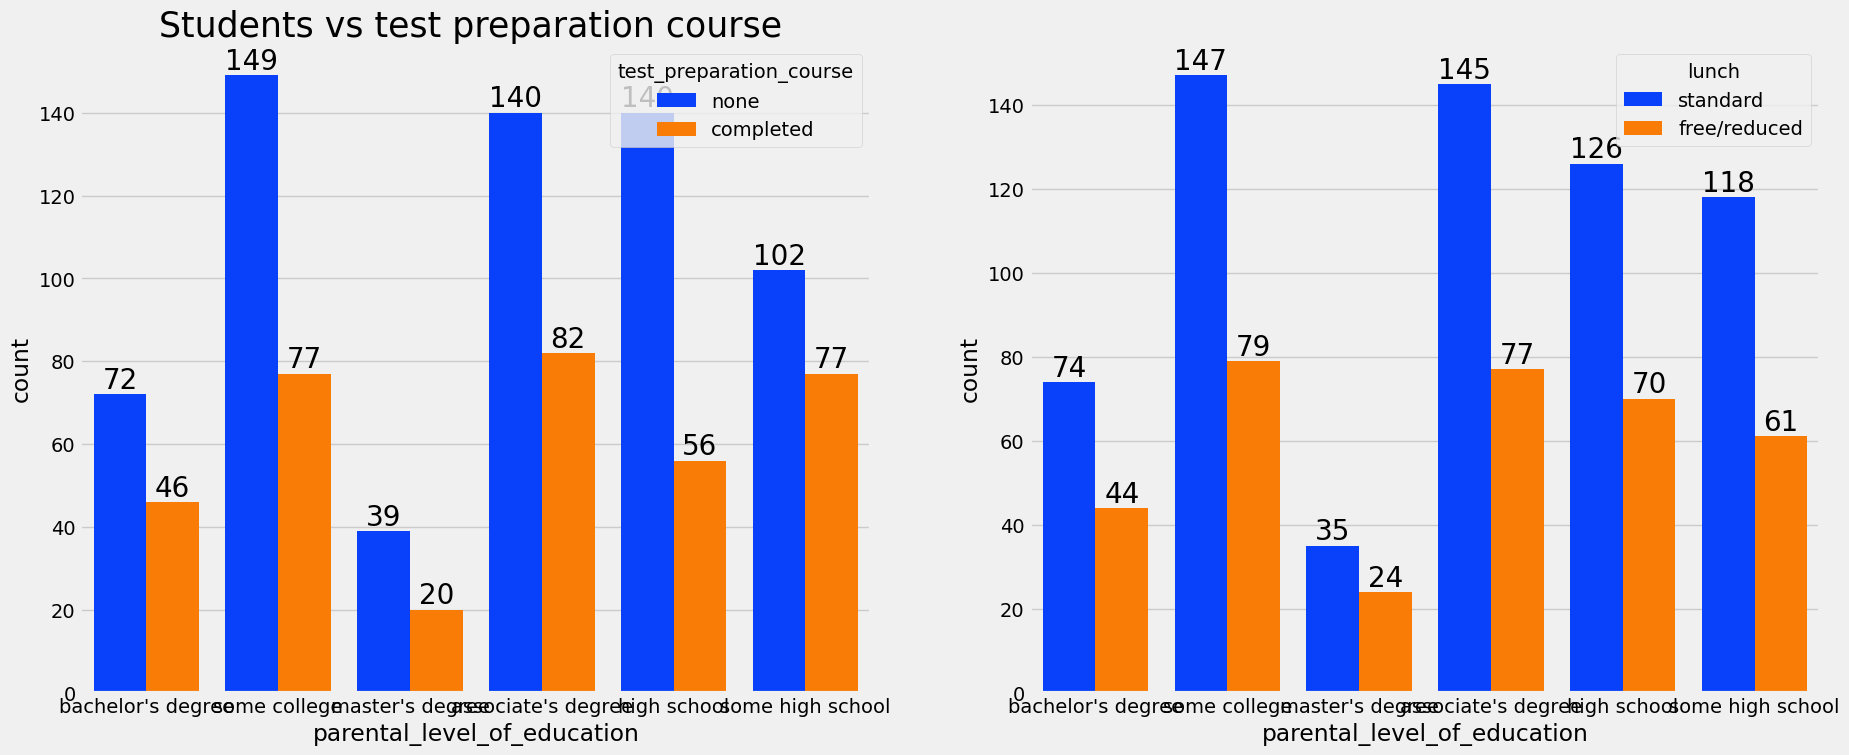

In [69]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=std_df['parental_level_of_education'],data=std_df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=std_df['parental_level_of_education'],data=std_df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 
plt.show()

#### Insights:
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

### 4.4.5 TEST PREPARATION COURSE COLUMN
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?
#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

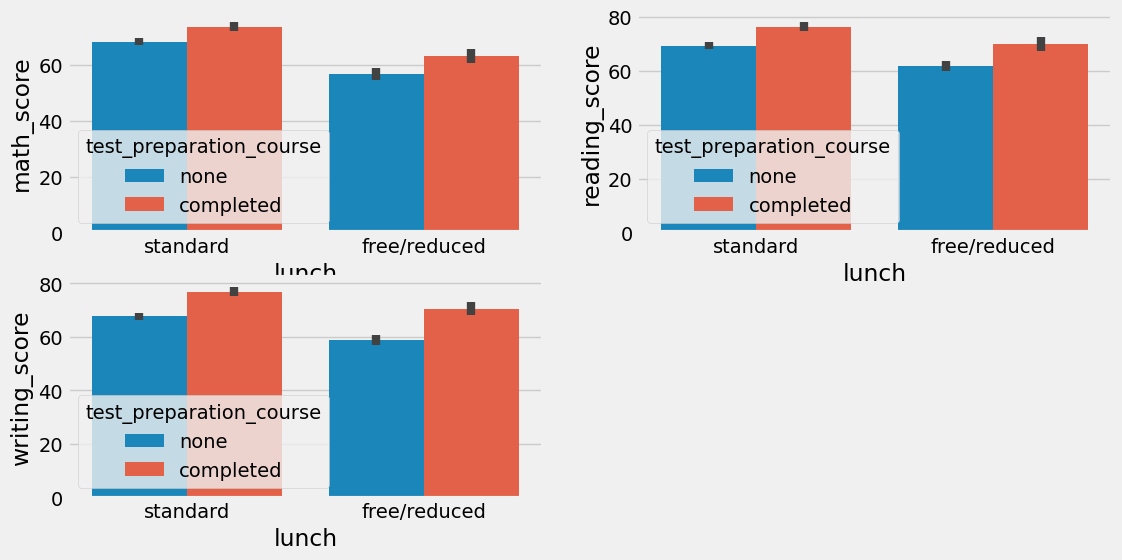

In [70]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=std_df['lunch'], y=std_df['math_score'], hue=std_df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=std_df['lunch'], y=std_df['reading_score'], hue=std_df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=std_df['lunch'], y=std_df['writing_score'], hue=std_df['test_preparation_course'])
plt.show()

#### Insights:
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### 4.4.6 CHECKING OUTLIERS

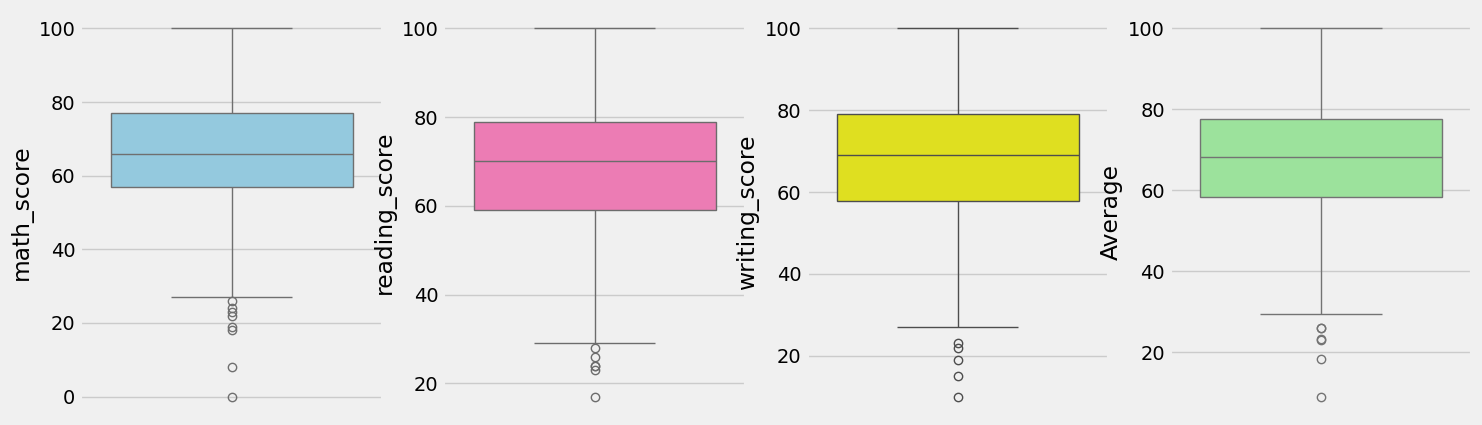

In [72]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(std_df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(std_df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(std_df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(std_df['Average'],color='lightgreen')
plt.show()

### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

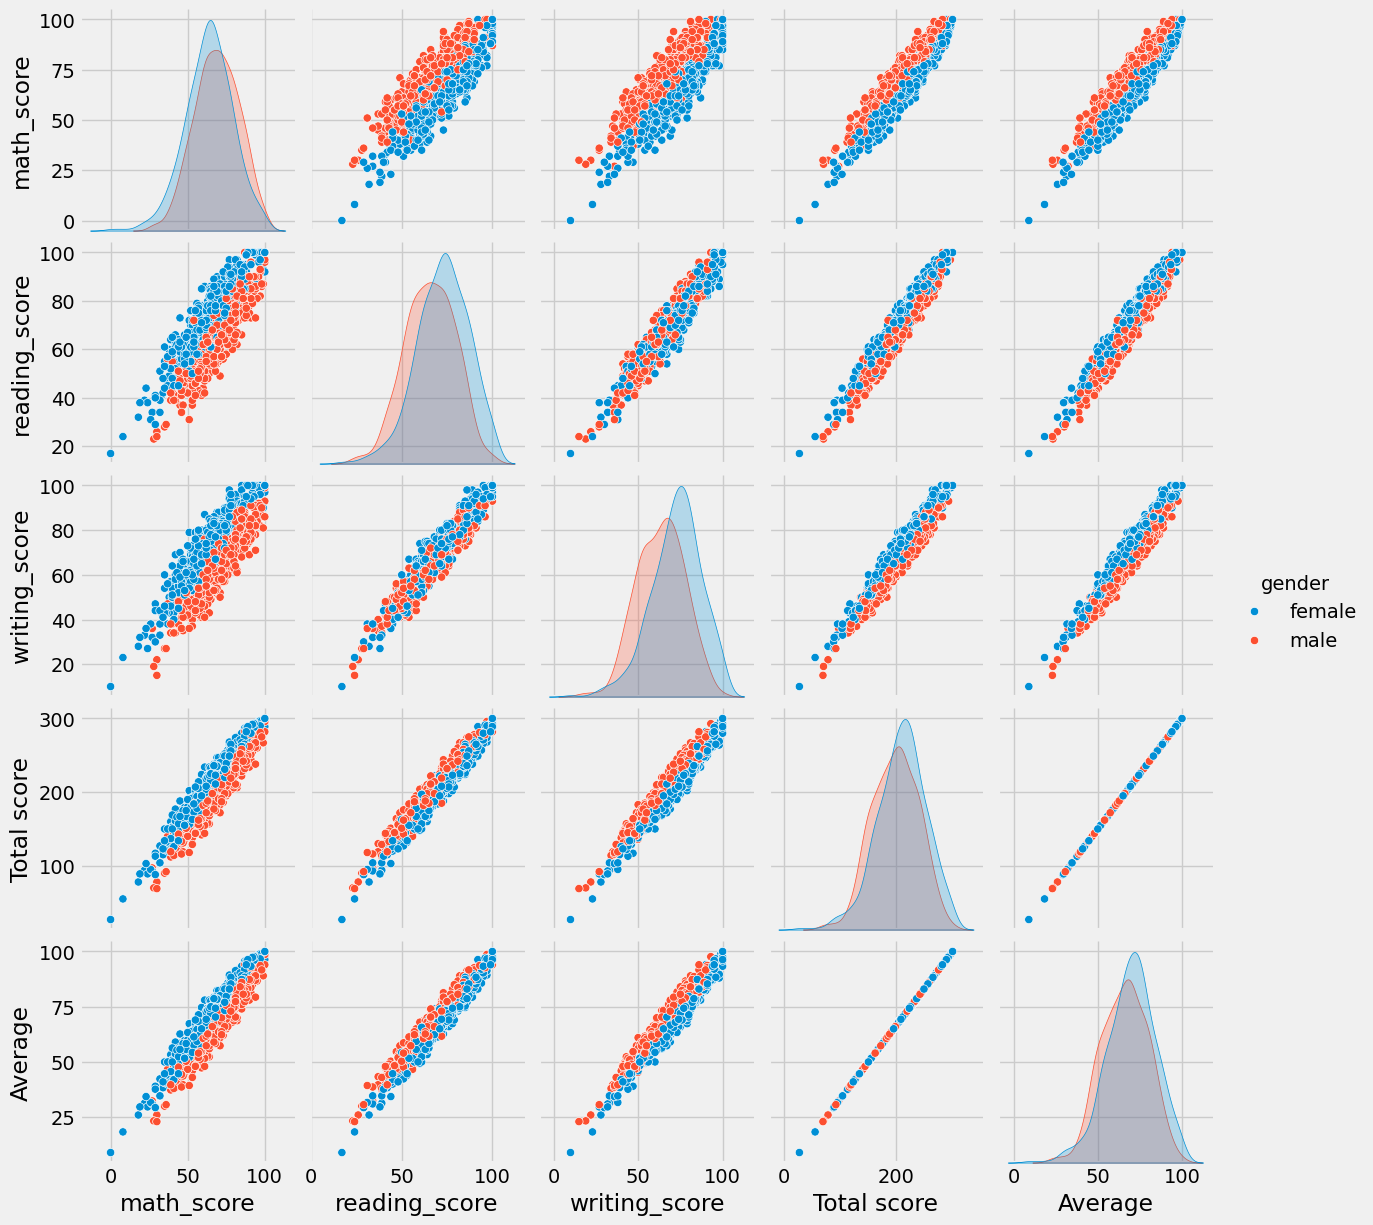

In [73]:
sns.pairplot(std_df,hue = 'gender')
plt.show()

#### Insights:
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.